# DATASET & CHARTS

## Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dataset

In [4]:
url = 'https://raw.githubusercontent.com/francheska-vicente/datapre-project/main_v2/data_output/combined_data.csv'
sdg_data = pd.read_csv (url)
sdg_data 

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,579938180.0,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164566009.0,9.492320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.975
392,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257595240.0,9.672276e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.850
393,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87077953.0,5.039756e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.350
394,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100730468.0,3.317629e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.525


## Line Charts

In [ ]:
regions_selected = []

In [ ]:
regions_selected = ['NCR: National Capital Region', 'Region 1: Ilocos Region']

In [ ]:
indicators_selected = []

In [ ]:
indicators_selected = ['1.4.1 Net JHS Enrolment Rate', '1.2.1 Poverty Proportion']

In [ ]:
two_region = pd.DataFrame ()

for region in regions_selected:
    if len (indicators_selected) > 1:
        temp_region = sdg_data [sdg_data['Geolocation'] == region][['Year', indicators_selected [0], indicators_selected [1]]]
    else:
        temp_region = sdg_data [sdg_data['Geolocation'] == region][['Year', indicators_selected [0]]]
    
    temp_region = pd.concat ([sdg_data['Geolocation'], temp_region], axis=1)
    
    temp_region = temp_region.dropna (thresh = len (indicators_selected) + 1)
    temp_region ['Year'] = temp_region ['Year'].astype('int')
    
    two_region = pd.concat([two_region, temp_region])
    
two_region = two_region.reset_index (drop = True)
two_region

In [ ]:
def line_update_layout (fig, title, label):
    fig.update_layout(
        # TITLE

        title={'text' : title, 'y': 0.95, 'x' : 0.5, # Position of the title
              # 'xanchor': 'center', 'yanchor': 'top'
              },
        title_font_family="Cambria",
        title_font_color="#000000",
        title_font_size=20,


        # axis and legend font
        font_family="Cambria",
        font_color="#000000",


        # x-axis
        xaxis_title='Year',

        xaxis=dict(
            showline=True,
            showgrid=False,
            showticklabels=True,
            linecolor='#000000',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Cambria',
                size=16,
                color='#000000',
            ),
        ),


        # y-axis
        yaxis_title = label, 

        yaxis=dict(
            showgrid=False,
            showline=True,
            showticklabels=True,
            linecolor='#000000',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Cambria',
                size=16,
                color='#000000',
            ),

        ),

        hovermode="x unified",

        autosize=True,

        # MARGIN
        # margin=dict(autoexpand=False, l=100, r=20,t=110),

        showlegend=True,

        paper_bgcolor="LightSteelBlue", # BG COLOR OUTSIDE CHART

        plot_bgcolor='light gray' # BG COLOR INSIDE CHART
    )
    
    return fig

In [ ]:
print (indicators_selected)

In [ ]:
indicator = indicators_selected [0]

In [ ]:
label = " ".join (indicator.split (' ') [1 : ])
df_visualization = two_region [['Geolocation', 'Year', indicator]]
df_visualization = df_visualization.dropna ()
    
x_axis_values = df_visualization ['Year'].unique ()
    
fig = px.line(df_visualization, x='Year', y = indicator, markers=True,
              labels={indicator: label}, color = 'Geolocation') 
title = " ".join (indicator.split (' ') [1 : ]) + ' per Year'
fig = line_update_layout (fig, title, label)
fig.update_xaxes(type='category')
    
fig.show ()

In [ ]:
for indicator in indicators_selected:
    label = " ".join (indicator.split (' ') [1 : ])
    df_visualization = two_region [['Geolocation', 'Year', indicator]]
    df_visualization = df_visualization.dropna ()
    
    x_axis_values = df_visualization ['Year'].unique ()
    
    fig = px.line(df_visualization, x='Year', y = indicator, markers=True,
             labels={indicator: label}, color = 'Geolocation') 
    title = " ".join (indicator.split (' ') [1 : ]) + ' per Year'
    fig = line_update_layout (fig, title, label)
    fig.update_xaxes(type='category')
    
    fig.show ()

## Bar Charts

### HORIZONTAL BAR CHART

In [ ]:
regions_selected = []

In [ ]:
regions_selected = ['NCR: National Capital Region', 'Region 1: Ilocos Region']

In [ ]:
indicators_selected = []

In [ ]:
indicators_selected = ['1.4.1 Net JHS Enrolment Rate', '1.2.1 Poverty Proportion']

In [ ]:
two_region = pd.DataFrame ()

for indicartor in indicators_selected:
    if len (indicators_selected) > 1:
        temp_region = sdg_data [['Year', indicators_selected [0], indicators_selected [1]]]
    else:
        temp_region = sdg_data [['Year', indicators_selected [0]]]
    
    temp_region = pd.concat ([sdg_data['Geolocation'], temp_region], axis=1)
    temp_region = temp_region [temp_region ['Geolocation'] != 'PHILIPPINES']
    temp_region = temp_region.dropna (thresh = len (indicators_selected) + 1)
    temp_region ['Year'] = temp_region ['Year'].astype('int')
    
    two_region = pd.concat([two_region, temp_region])
    
two_region = two_region.reset_index (drop = True)
two_region

In [ ]:
def bar_update_layout (fig, title, label):
    fig.update_layout(
    # TITLE
    
        title={'text': title, 'y':0.95, 'x':0.5, # Position of the title
              # 'xanchor': 'center', 'yanchor': 'top'
              },    
        title_font_family="Cambria",
        title_font_color="#000000",
        title_font_size=20,

        # axis font
        font_family="Cambria",
        font_color="#000000",


        # x-axis
        xaxis_title= label,

        xaxis=dict(
            showline=True,
            showgrid=False,
            showticklabels=True,
            linecolor='#000000',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Cambria',
                size=14,
                color='#000000',
            ),
        ),

        # y-axis
        yaxis_title='Geolocation',
        yaxis=dict(
            {'categoryorder':'total ascending'}, # ascending values from bottom to top
            showgrid=False,
            showline=True,
            showticklabels=True,
            linecolor='#000000',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Cambria',
                size=10,
                color='#000000',
            ),
        ),

        autosize=True,

        # margin=dict(autoexpand=False, l=100, r=20,t=110),

        showlegend=True,

        plot_bgcolor='light grey'
    )

    return fig

In [ ]:
geolocation_values = []
for temp in sdg_data ['Geolocation'].unique () [1 :]:
    temp = temp.split (":")
    geolocation_values.append (temp [1])

In [ ]:
for indicator in indicators_selected:
    label = " ".join (indicator.split (' ') [1 : ])
    df_visualization = two_region [['Geolocation', 'Year', indicator]]
    df_visualization = df_visualization.dropna ()
    
    year_values = df_visualization ['Year'].unique ()
    
    df_visualization_curr = df_visualization [df_visualization ['Year'] == year_values [-1]]
    df_visualization_curr = df_visualization_curr.drop_duplicates ()
    fig = px.bar(df_visualization_curr, x = indicator, y = geolocation_values,
             labels={indicator: label}, color = 'Geolocation') 
    title = " ".join (indicator.split (' ') [1 : ]) + ' of the Year ' + str (year_values [-1])
    fig = bar_update_layout (fig, title, label)
    
    fig.show ()

## Heat Map

In [5]:
sdg_columns = sdg_data.columns [:-15]
sdg_columns

Index(['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion

In [6]:
targets_value = ['Target Number', '', '1.2.', '1.4.', '1.4.', '1.4.', '1.4.', '1.4.', '1.4.', '1.4.', '1.4.', '1.4.', '1.5.', 
 '3.4.', '3.4.', '3.4.', '3.4.', '3.4.', '3.7.', '3.7.', '4.1.', '4.1.', '4.1.', '4.1.', '4.1.', 
 '4.1.', '4.1.', '4.1.', '4.1.', '', '7.1.', '8.1.', '10.1.', '10.1.', '14.5.', '14.5.', 
 '16.1.', '16.1.']

In [7]:
targets_df = pd.DataFrame ([targets_value], columns = sdg_columns)
targets_df

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,Target Number,,1.2.,1.4.,1.4.,1.4.,1.4.,1.4.,1.4.,1.4.,...,4.1.,,7.1.,8.1.,10.1.,10.1.,14.5.,14.5.,16.1.,16.1.


In [8]:
sdg_data_only = sdg_data [sdg_columns]
sdg_data_only

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,378.0,NaN,NaN,NaN,NaN,NaN,NaN,5.616247,285.0
392,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,543.0,NaN,NaN,NaN,NaN,NaN,NaN,6.627875,356.0
393,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,153.0,NaN,NaN,NaN,NaN,NaN,NaN,4.031386,201.0
394,CARAGA: CARAGA Administrative Region,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,7.799533,217.0


<Axes: xlabel='Target Number', ylabel='Target Number'>

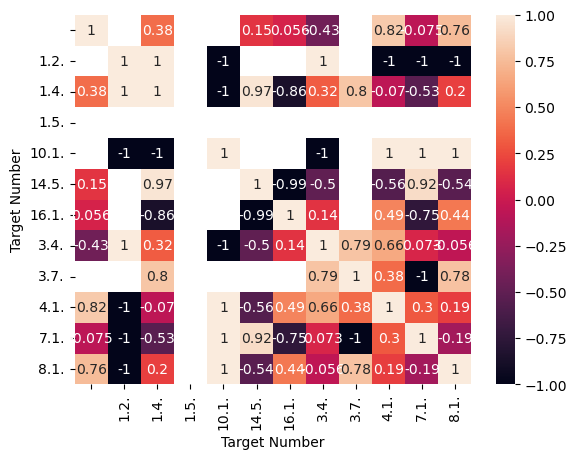

In [9]:
region_selected = 'PHILIPPINES'

region_df = sdg_data_only [sdg_data_only ['Geolocation'] == region_selected]
region_df = pd.concat ([targets_df, region_df]).reset_index (drop = True)
region_df = region_df.T
region_df.columns = region_df.iloc [0]
region_df = region_df.drop (['Geolocation', 'Year'], axis = 0)
region_df = region_df.groupby ('Target Number', group_keys=True).mean ().T
region_df_corr = region_df.corr ()

sns.heatmap(region_df_corr, annot = True)